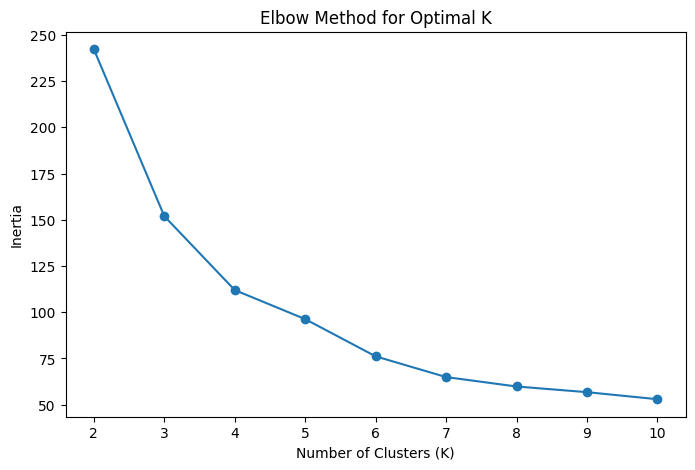

Silhouette Score: 0.4143182730220664
Davies-Bouldin Index: 0.7726853895682169


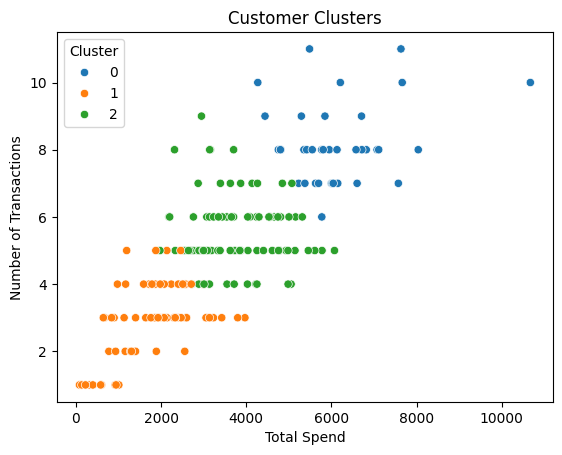

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Data
customers = pd.read_csv(r"C:\Users\Aniket\Downloads\Customers.csv")
transactions = pd.read_csv(r"C:\Users\Aniket\Downloads\Transactions.csv")

# Step 3: Merge Data
# Merge transactions with customers and aggregate features for clustering
transactions_customers = transactions.merge(customers, on="CustomerID", how="left")
aggregated_data = transactions_customers.groupby("CustomerID").agg({
    "TotalValue": "sum",  # Total spend
    "TransactionID": "count",  # Number of transactions
    "Quantity": "sum"  # Total quantity purchased
}).rename(columns={
    "TotalValue": "TotalSpend",
    "TransactionID": "NumTransactions",
    "Quantity": "TotalQuantity"
}).reset_index()

# Step 4: Data Preprocessing
# Normalizing numerical features
scaler = StandardScaler()
features = ["TotalSpend", "NumTransactions", "TotalQuantity"]
aggregated_data_scaled = scaler.fit_transform(aggregated_data[features])

# Step 5: K-Means Clustering
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(aggregated_data_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

# Step 6: Fit Final Model
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(aggregated_data_scaled)


aggregated_data["Cluster"] = cluster_labels

# Step 7: Evaluate Clustering
silhouette_avg = silhouette_score(aggregated_data_scaled, cluster_labels)
db_index = davies_bouldin_score(aggregated_data_scaled, cluster_labels)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {db_index}")

# Step 8: Visualize Clusters

sns.scatterplot(
    x=aggregated_data["TotalSpend"], 
    y=aggregated_data["NumTransactions"], 
    hue=aggregated_data["Cluster"], 
    palette="tab10"
)
plt.title("Customer Clusters")
plt.xlabel("Total Spend")
plt.ylabel("Number of Transactions")
plt.show()

# Step 9: Save Results
aggregated_data.to_csv("ClusteringResults.csv", index=False)
